## Tests for graph from DB

In [2]:
from sqlalchemy import create_engine

from family_graph import build_Newick_tree

import numpy as np
import matplotlib.pyplot as plt

In [5]:
new_db_path = r'D:\kasia\tracking\E6_exp\code\gardener_20_dev\cells_database_2tables.db'
engine = create_engine(f'sqlite:///{new_db_path}')

In [10]:
my_root = 5 
# 75012	

tree = build_Newick_tree(engine, my_root)

In [11]:
t_rendering = tree.render('')

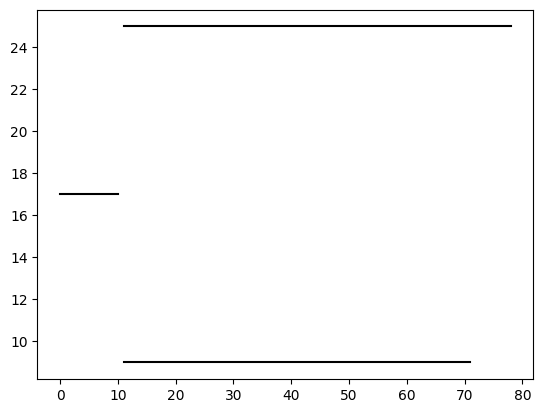

In [12]:
for n in tree.traverse():

    if not n.is_root():
        
        # get position in time
        x1 = n.start
        x2 = n.stop
        x_signal = [x1,x2]

        y_signal = np.mean([t_rendering['node_areas'][n.num][1],
                            t_rendering['node_areas'][n.num][3]]).repeat(2)

        plt.plot(x_signal,y_signal,'k')

## Addtional tests

In [43]:
# get df for this root

my_root = 75012	

with Session(engine) as session:
    
    query = session.query(TrackDB).filter(TrackDB.root == my_root)
    df = pd.read_sql(query.statement, engine)

df

,track_id,parent_track_id,root,t_begin,t_end
0,75012,-1,75012,238,238
1,75013,75012,75012,239,240
2,75014,75012,75012,239,240


In [9]:
# to get an entire df
df = pd.read_sql_table('tracks', engine)

In [12]:
df

,track_id,parent_track_id,root,t_begin,t_end
0,1,-1,1,0,73
1,2,1,1,74,160
2,3,1,1,74,169
3,4,-1,4,0,154
4,5,-1,5,0,10
...,...,...,...,...,...
75013,75014,75012,75012,239,240
75014,75015,-1,75015,238,240
75015,75016,-1,75016,238,240
75016,75017,-1,75017,238,240
